#**Salary Predictions Based on Job Descriptions**

In [1]:
__author__ = "Mohamad Radwan"
__email__ = "mohrad96@hotmail.com"

In this project, we are tasked with finding an appropriate model to predict salaries based on 7 features. This can help HR employees develop appropriate salary ranges for new positions to be offered in their respective companies. Exploratory Data Analysis is performed first, and then Predictive Modeling using feature engineering is done where GradientBoostingRegressor turns out to be the best model. Afterwards, the results are displayed and saved(deployed).

##<b>Exploratory Data Analysis

This script loads, explores, and visualizes the salary prediction datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

###**Load the data**

In [3]:
# Unzip the rar file
get_ipython().system_raw("unrar x data.rar")

In [4]:
# Read in files 
train_feature_df = pd.read_csv('data/train_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')
test_feature_df = pd.read_csv('data/test_features.csv')

###**Examine the data**

In [5]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [6]:
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [7]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


###**Use .info() to see length and dtypes**

In [8]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [10]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


###**Check for duplicates**

In [11]:
train_feature_df.duplicated().sum()

0

In [12]:
train_target_df.duplicated().sum()

0

In [13]:
test_feature_df.duplicated().sum()

0

###**Identify numerical and categorical variables**

In [14]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [15]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']

In [16]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

###**Summarize numerical and categorical variables separately**

In [17]:
train_feature_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [18]:
train_feature_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685084753,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


###**Merge features and targets into single df and delete original dfs**

In [19]:
# Merge the features and salaries on jobId, delete original file to save memory
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

In [20]:
del train_feature_df
del train_target_df

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [22]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


###**Visualize target variable (salary)**

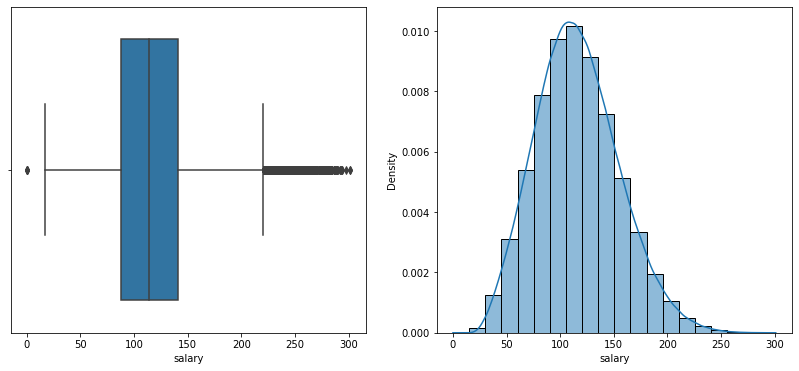

In [23]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(x = train_df.salary)
plt.subplot(1,2,2)
sns.histplot(x = train_df.salary, stat = 'density', bins = 20, kde = True)
plt.show()

###**Use IQR rule to identify potential outliers**

In [24]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper_bound = stat['75%'] + 1.5 * IQR
lower_bound = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper_bound, lower_bound))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


###**Examine potential outliers**

In [25]:
#check for potential outliers below lower bound
train_df[train_df.salary < lower_bound]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


These entries with zero salary do not appear to be volunteer positions. We are confident that they are instances of missing/corrupt data and should be removed from the training set.

In [26]:
#check for potential outliers above upper bound
train_df.loc[train_df.salary > upper_bound, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [27]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > upper_bound) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


The high-salary potential outliers all appear to be legitimate data. Most roles are C-level executive roles and the junior positions are in industries that are well known for high salaries (oil, finance). We determine these entries to be legitimate and will not remove them.

In [28]:
# Remove data with zero salaries
train_df = train_df[train_df.salary > lower_bound]

###**Visualizing Potential Correlations**

In [29]:
def plot_feature(df, col):
    '''
    Make plots for each feature
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the object variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

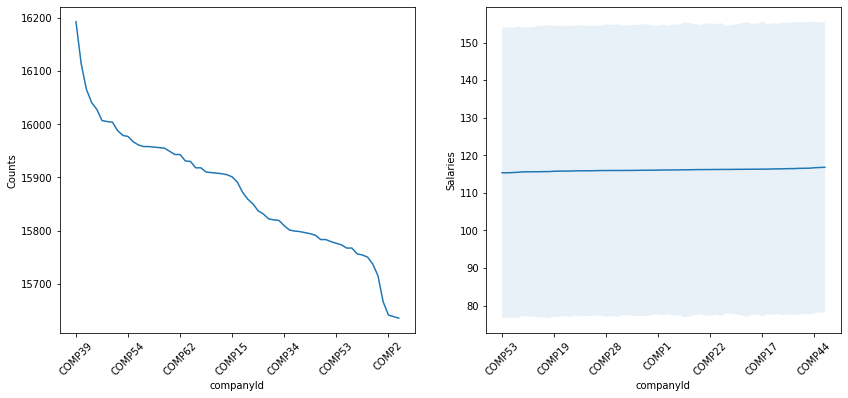

In [30]:
plot_feature(train_df, 'companyId')

**The salary is weakly associated with companies.**

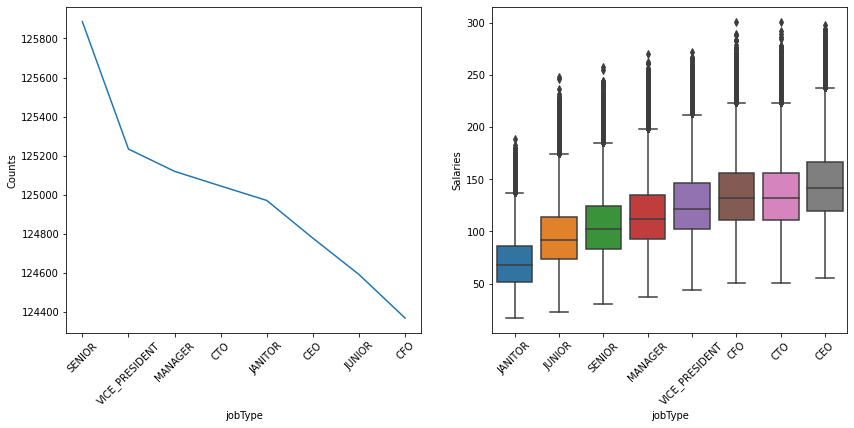

In [31]:
plot_feature(train_df, 'jobType')

**There is a clear positive correlation between job type and salary.**

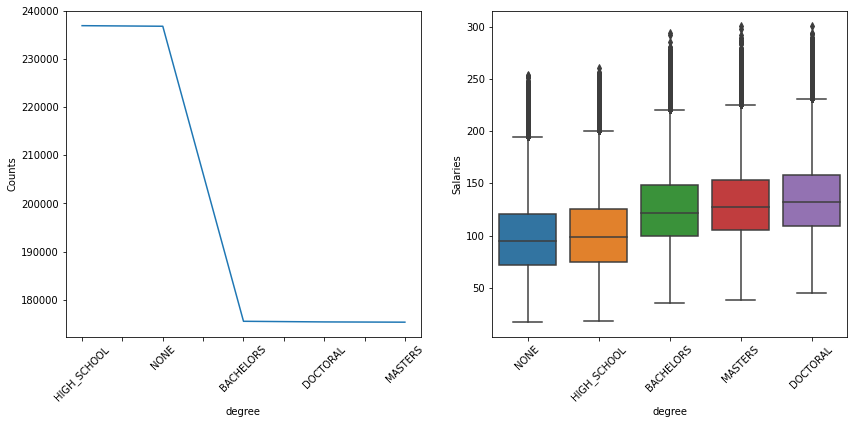

In [32]:
plot_feature(train_df, 'degree')

**More advanced degrees tend to correspond to higher salaries.**

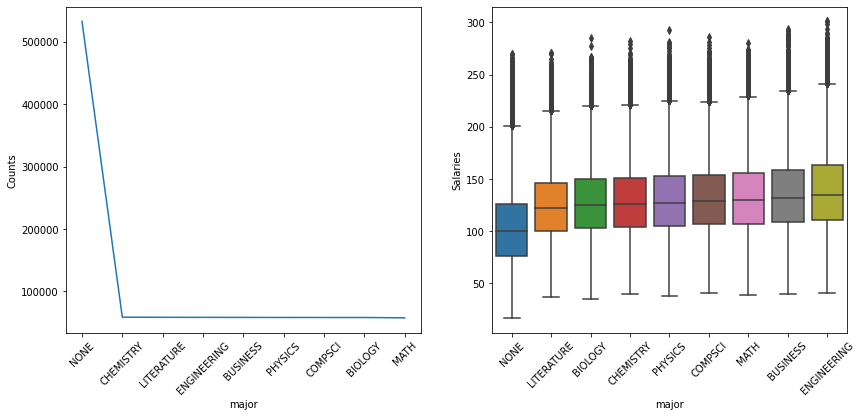

In [33]:
plot_feature(train_df, 'major')

**People with majors of engineering, business and math generally have higher salaries.**

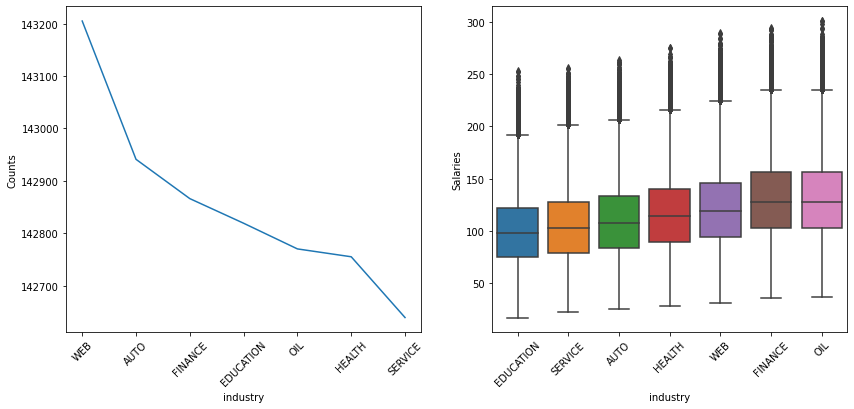

In [34]:
plot_feature(train_df, 'industry')

**As for industries, oil, finance and web industries generally pay better.**

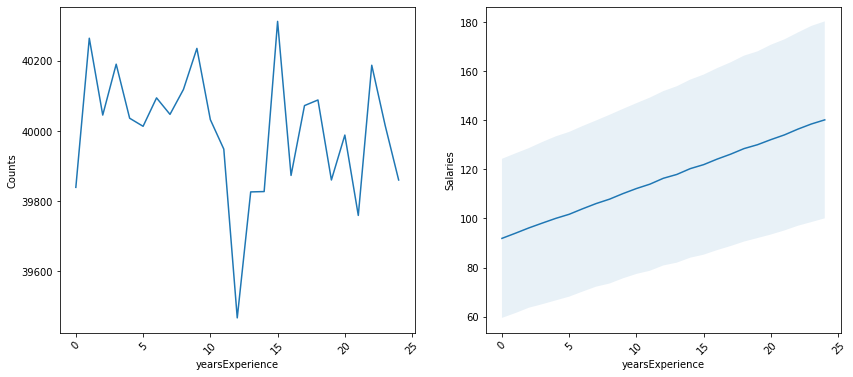

In [35]:
plot_feature(train_df, 'yearsExperience')

**In general, there is a clear positive correlation between salary and years of experience.**

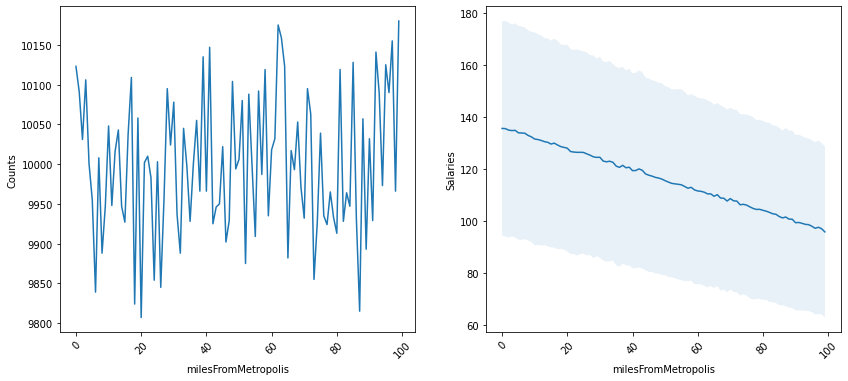

In [36]:
plot_feature(train_df, 'milesFromMetropolis')

**In general, salaries decrease with the distance to metropolis.**

In [37]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [38]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)
        train_df[col] = train_df[col].astype('int')

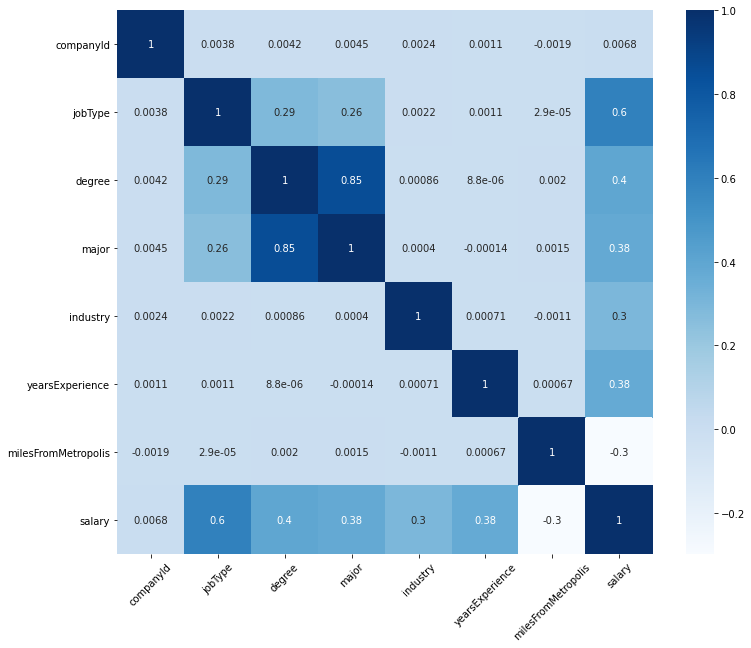

In [39]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

We see that jobType is most strongly correlated with salary, followed by degree, major, and yearsExperience.

Among the features, we see that degree and major have a strong degree of correlation and jobType has a moderate degree of correlation with both degree and major.

##**Predictive Modeling**

In [40]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

###**Define Data class**

In [41]:
class Data:
    def __init__(self, train_feature_file, train_target_file, test_file, cat_cols, num_cols, target_col, id_col):
        '''create train and test dataframe'''
        #create new copies instead of references
        self.cat_cols = list(cat_cols)
        self.num_cols = list(num_cols)
        self.feature_cols = cat_cols + num_cols
        self.target_col = target_col
        self.id_col = id_col
        self.label_encoders = {}
        self.train_df = self._create_train_df(train_feature_file, train_target_file)
        self.test_df = self._create_test_df(test_file)
    
    def label_encode_df(self, df, cols):
        '''creates one label encoder for each column in the data object instance'''
        for col in cols:
            if col in self.label_encoders:
                #if label encoder already exits for col, use it
                self._label_encode(df, col, self.label_encoders[col])
            else:
                self._label_encode(df, col)
    
    def inverse_encode_df(self, df, cols):
        '''does inverse label encoding'''
        for col in cols:
            if col in self.label_encoders:
                self._inverse_label_encode(df, col)  
            else:
                raise ValueError("label_encoders must be define for each col before calling inverse_encode_df")

    def _label_encode(self, df, col, le=None):
        '''label encodes data'''
        if le:
            df[col] = le.transform(df[col])
        else:
            le = LabelEncoder()
            le.fit(df[col])
            df[col] = le.transform(df[col])
            self.label_encoders[col] = le
        
    def _inverse_label_encode(self, df, col):
        '''inverse label encodes data'''
        le = self.label_encoders[col]
        df[col] = le.inverse_transform(df[col])
 
    def _create_train_df(self, train_feature_file, train_target_file, preprocess=True, label_encode=True):
        '''loads and merges training data features and targets, preprocesses data, encodes data'''
        train_feature_df = self._load_data(train_feature_file)
        train_target_df = self._load_data(train_target_file)
        train_df = self._merge_dfs(train_feature_df, train_target_df, self.id_col)
        if preprocess:
            train_df = self._clean_data(train_df)
            train_df = self._shuffle_data(train_df)
        if label_encode:
            self.label_encode_df(train_df, self.cat_cols)
        return train_df
    
    def _create_test_df(self, test_file, label_encode=True):
        '''loads and label encodes test data'''
        test_df = self._load_data(test_file)
        if label_encode:
            self.label_encode_df(test_df, self.cat_cols)
        return test_df
        
    def _load_data(self, file):
        return pd.read_csv(file)
    
    def _merge_dfs(self, df1, df2, key=None, left_index=False, right_index=False):
        return pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index)
    
    def _clean_data(self, df):
        '''remove rows that contain salary <= 0 or duplicate job IDs'''
        df = df.drop_duplicates(subset='jobId')
        df = df[df.salary>0]
        return df
    
    def _shuffle_data(self, df):
         return shuffle(df).reset_index()

###**Define FeatureGenerator class**

In [42]:
class FeatureGenerator:
    def __init__(self, data):
        '''initializes class and creates groupby object for data'''
        self.data = data
        #able to generate features for new companies, but less accurate
        #self.cat_cols = ['jobType', 'degree', 'major', 'industry']
        self.cat_cols = data.cat_cols
        self.groups = data.train_df.groupby(self.cat_cols)
        
    def add_group_stats(self):
        '''adds group statistics to data stored in data object'''
        #get group stats
        group_stats_df = self._get_group_stats()
        group_stats_df.reset_index(inplace=True)
  
        #merge derived columns to original df
        self.data.train_df = self._merge_new_cols(self.data.train_df, group_stats_df, self.cat_cols, fillna=True)
        self.data.test_df = self._merge_new_cols(self.data.test_df, group_stats_df, self.cat_cols, fillna=True)      
        
        #update column lists
        group_stats_cols = ['group_mean', 'group_max', 'group_min', 'group_std', 'group_median']
        self._extend_col_lists(self.data, cat_cols=group_stats_cols)  
        
    def _get_group_stats(self):
        '''calculates group statistics'''
        target_col = self.data.target_col
        group_stats_df = pd.DataFrame({'group_mean': self.groups[target_col].mean()})
        group_stats_df['group_max'] = self.groups[target_col].max()
        group_stats_df['group_min'] = self.groups[target_col].min()
        group_stats_df['group_std'] = self.groups[target_col].std()
        group_stats_df['group_median'] = self.groups[target_col].median()
        return group_stats_df
        
    def _merge_new_cols(self, df, new_cols_df, keys, fillna=False):
        '''merges engineered features with original df'''
        df = pd.merge(df, new_cols_df, on=keys, how='left')
        if fillna:
            df.fillna(0, inplace=True)
        return df
        
    def _extend_col_lists(self, data, cat_cols=[], num_cols=[]):
        '''addes engineered feature cols to data col lists'''
        data.num_cols.extend(num_cols)
        data.cat_cols.extend(cat_cols)
        data.feature_cols.extend(num_cols + cat_cols)

###**Define ModelContainer class**

In [43]:
class ModelContainer:
    def __init__(self, models=[]):#, default_num_iters=10, verbose_lvl=0):
        '''initializes model list and dicts'''
        self.models = models
        self.best_model = None
        self.predictions = None
        self.mean_mse = {}
        #self.default_num_iters = default_num_iters
        #self.verbose_lvl = verbose_lvl
        
    def add_model(self, model):
        self.models.append(model)

    def cross_validate(self, data, k=3, num_procs=1):
        '''cross validate models using given data'''
        feature_df = data.train_df[data.feature_cols]
        target_df = data.train_df[data.target_col]
        for model in self.models:
            neg_mse = cross_val_score(model, feature_df, target_df, cv=k, n_jobs=num_procs, scoring='neg_mean_squared_error')
            self.mean_mse[model] = -1.0*np.mean(neg_mse)
    
    def select_best_model(self):
        '''select model with lowest mse'''
        self.best_model = min(self.mean_mse, key=self.mean_mse.get)
        
    def best_model_fit(self, features, targets):
        '''fits best model'''
        self.best_model.fit(features, targets)
    
    def best_model_predict(self, features):
        '''scores features using best model'''
        self.predictions = self.best_model.predict(features)
    
    @staticmethod
    def get_feature_importance(model, cols):
        '''retrieves and sorts feature importances'''
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_importances = pd.DataFrame({'feature':cols, 'importance':importances})
            feature_importances.sort_values(by='importance', ascending=False, inplace=True)
            #set index to 'feature'
            feature_importances.set_index('feature', inplace=True, drop=True)
            return feature_importances
        else:
            #some models don't have feature_importances_
            return "Feature importances do not exist for given model"

    def print_summary(self):
        '''prints summary of models, best model, and feature importance'''
        print('\nModel Summaries:\n')
        for model in self.mean_mse:
            print('\n', model, '- MSE:', self.mean_mse[model])
        print('\nBest Model:\n', self.best_model)
        print('\nMSE of Best Model\n', self.mean_mse[self.best_model])
        print('\nFeature Importances\n', self.get_feature_importance(self.best_model, data.feature_cols))

        feature_importances = self.get_feature_importance(self.best_model, data.feature_cols)
        feature_importances.plot.bar()
        plt.show()
    
    def save_results(self):
        '''saves model, model summary, feature importances, and predictions'''
        with open('model.txt', 'w') as file:
          file.write(str(self.best_model))
        self.get_feature_importance(self.best_model, data.feature_cols).to_csv('feature_importances.csv') 
        #np.savetxt('predictions.csv', self.predictions, delimiter=',')
        Predictions = pd.DataFrame({data.id_col:data.test_df[data.id_col], 'Predicted Salary':self.predictions})
        Predictions.set_index(data.id_col, inplace=True, drop=True)
        Predictions.to_csv('predictions.csv')

###**Define parameters needed to create and run models**

In [44]:
#define number of processors to use for parallel runs
num_procs = 4

#set verbose level for models
verbose_lvl = 0

#define input files
train_feature_file = 'data/train_features.csv'
train_target_file = 'data/train_salaries.csv'
test_file = 'data/test_features.csv'

#define variables
cat_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']
num_cols = ['yearsExperience', 'milesFromMetropolis']
target_col = 'salary'
id_col = 'jobId'

#turn feature engineering on/off
engineer_features = True

###**Create Data object**

In [45]:
data = Data(train_feature_file, train_target_file, test_file, cat_cols, num_cols, target_col, id_col)

###**Engineer features**

In [46]:
if engineer_features:
    feature_generator = FeatureGenerator(data)
    feature_generator.add_group_stats()

###**Create model container and add models to it**

In [47]:
#create model container
models = ModelContainer()

#create models -- hyperparameter tuning already done by hand for each model
models.add_model(LinearRegression())
models.add_model(RandomForestRegressor(n_estimators=60, n_jobs=num_procs, max_depth=15, min_samples_split=80,
                                       max_features=8, verbose=verbose_lvl))
models.add_model(GradientBoostingRegressor(n_estimators=40, max_depth=7, loss='ls', verbose=verbose_lvl))

###**Cross validate models, then select, fit, and score test data with best model**

In [48]:
models.cross_validate(data, k=2, num_procs=num_procs)
models.select_best_model()
models.best_model_fit(data.train_df[data.feature_cols], data.train_df[data.target_col])
models.best_model_predict(data.test_df[data.feature_cols])

###**Summarize and save results**


Model Summaries:


 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) - MSE: 358.17846836529804

 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=80, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) - MSE: 313.738557258858

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_sample

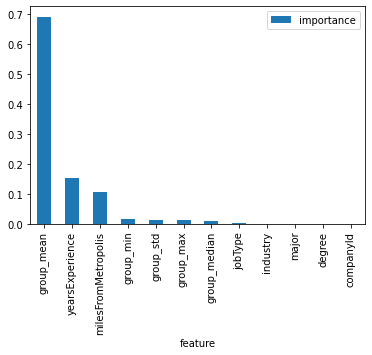

In [49]:
models.print_summary()
models.save_results()